In [1]:
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from math import pi
import operator

#Sklearn programs
from sklearn import neighbors
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# to make this notebook's output identical at every run
np.random.seed(42)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#See max rows
pd.set_option('display.max_rows', None)

In [2]:
#Get the data
df = pd.read_csv("/Users/dustin.ellis/Desktop/Desktop/Data Projects/Spotify/spotifydata.csv")
df.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,playlist
0,Kurt Vile,b'lieve i'm goin down...,Pretty Pimpin,3l9eg9RtisizG12a1D6nZl,0.566,0.664,8,-9.081,1,0.0281,0.305000,0.0903,0.764,91.117,298760,4,0.0,Top 5000 Songs
1,The National,Trouble Will Find Me,I Need My Girl,50M7nY1oQuNHecs0ahWAtI,0.520,0.436,0,-11.508,0,0.0355,0.065100,0.1230,0.114,126.053,245240,4,64.0,Top 5000 Songs
2,Galaxie 500,On Fire,Strange,2TTAPkrGQQOZkaUTUlt21Q,0.312,0.844,7,-7.085,1,0.0511,0.023100,0.0793,0.626,97.039,199467,4,48.0,Top 5000 Songs
3,Windir,1184,Todeswalzer,7BvcpEdO7PUDGGSER1S9LA,0.236,0.870,2,-4.747,0,0.0579,0.930000,0.3050,0.186,167.845,295131,4,33.0,Top 5000 Songs
4,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1,-5.934,1,0.0598,0.000095,0.0897,0.334,171.005,200040,4,90.0,Top 5000 Songs


In [3]:
#We already have the track name, so the track ID is useless
df = df.drop('track_id', axis=1)

## Data definitions

Artist — singer or band

Album - name of the album

Track Name - Name of track 

Danceability — the higher the value, the easier it is to dance to this song

Energy — energy: the higher the value the more energetic

Key - The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

Loudness — the higher the value, the louder the song (in dB)

Mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

Speechiness -  the higher the value the more spoken word the song contains

Instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

Liveness — the higher the value, the more likely the song is a live recording

Valence —  the higher the value, the more positive mood for the song

Tempo — beats per minute 

Duration —  the length of the song in milliseconds

Time signature - An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

Playlist - Name of playlist song is featured on



### Exploratory Data Analysis

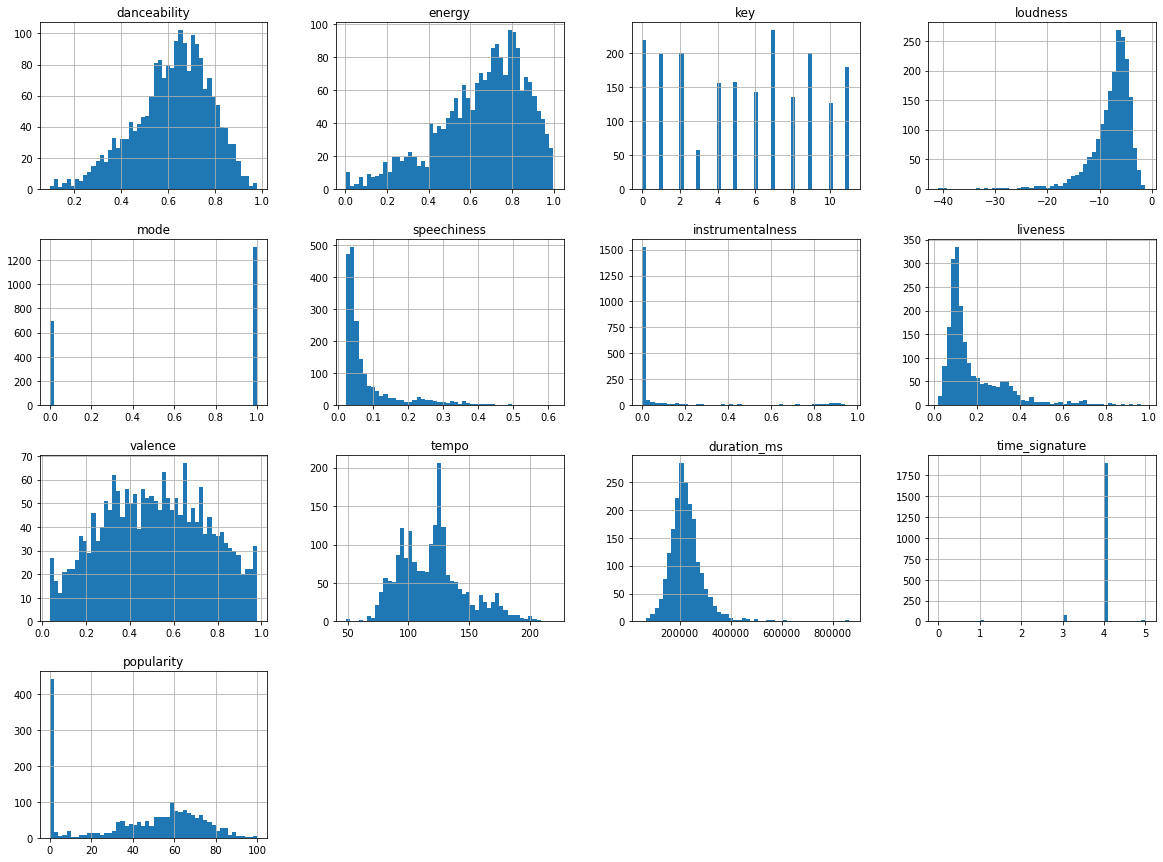

In [4]:
# plot a histogram for each numerical attribute to get a feel of data
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

### Data cleaning

In [5]:
#check for duplicate tracks
df.track_name.duplicated().sum()

96

In [6]:
# Considering certain columns for dropping duplicates
df.drop_duplicates(subset=['track_name'], inplace = True)

In [7]:
#recheck column values to see how much data was lost
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1912 entries, 0 to 2007
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1912 non-null   object 
 1   album             1912 non-null   object 
 2   track_name        1912 non-null   object 
 3   danceability      1912 non-null   float64
 4   energy            1912 non-null   float64
 5   key               1912 non-null   int64  
 6   loudness          1912 non-null   float64
 7   mode              1912 non-null   int64  
 8   speechiness       1912 non-null   float64
 9   instrumentalness  1912 non-null   float64
 10  liveness          1912 non-null   float64
 11  valence           1912 non-null   float64
 12  tempo             1912 non-null   float64
 13  duration_ms       1912 non-null   int64  
 14  time_signature    1912 non-null   int64  
 15  popularity        1912 non-null   float64
 16  playlist          1912 non-null   object 


In [8]:
#Check for duplicate tracks
df.track_name.duplicated().sum()

0

## Splitting data into testing and training

In [9]:
from sklearn.model_selection import train_test_split

#Split data into training and testing (80-20 split)
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

#Set labels
train_labels = train_set["playlist"] 
test_labels = test_set["playlist"]

#Drop target from training and testing set
true_train_set = train_set.drop("playlist", axis = 1)
true_test_set = test_set.drop("playlist", axis = 1)

In [10]:
#preview training data
true_train_set.head()

,artist,album,track_name,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
1442,MS MR,Secondhand Rapture,Hurricane,0.564,0.680,2,-6.487,1,0.0357,0.000179,0.247,0.262,89.938,226373,4,52.0
1740,JVKE,golden hour,golden hour,0.511,0.594,1,-4.799,0,0.0316,0.177000,0.249,0.143,94.473,209260,3,84.0
1873,Ty Dolla $ign,Free TC (Deluxe Edition),Wavy (feat. Joe Moses),0.747,0.482,11,-8.472,1,0.1310,0.000000,0.109,0.716,105.085,187671,4,62.0
341,Kings of Leon,Mechanical Bull (Expanded Edition),Temple,0.475,0.644,9,-7.782,1,0.0326,0.279000,0.123,0.568,149.838,250453,4,57.0
1461,Red Hot Chili Peppers,Greatest Hits,Soul to Squeeze,0.663,0.546,5,-5.234,1,0.0269,0.000572,0.107,0.656,88.171,289533,4,68.0


In [11]:
#Since duration, time signature, and popularity does not tell much information, they are dropped
true_train_set = true_train_set.drop(["duration_ms", "time_signature", "popularity"], axis = 1)
true_test_set = true_test_set.drop(["duration_ms", "time_signature", "popularity"], axis = 1)

In [12]:
#preview training set again after dropped columns of duration, time signature, and popularity
true_train_set.head()

,artist,album,track_name,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
1442,MS MR,Secondhand Rapture,Hurricane,0.564,0.680,2,-6.487,1,0.0357,0.000179,0.247,0.262,89.938
1740,JVKE,golden hour,golden hour,0.511,0.594,1,-4.799,0,0.0316,0.177000,0.249,0.143,94.473
1873,Ty Dolla $ign,Free TC (Deluxe Edition),Wavy (feat. Joe Moses),0.747,0.482,11,-8.472,1,0.1310,0.000000,0.109,0.716,105.085
341,Kings of Leon,Mechanical Bull (Expanded Edition),Temple,0.475,0.644,9,-7.782,1,0.0326,0.279000,0.123,0.568,149.838
1461,Red Hot Chili Peppers,Greatest Hits,Soul to Squeeze,0.663,0.546,5,-5.234,1,0.0269,0.000572,0.107,0.656,88.171


In [13]:
#Separate categorical and numerical variables for pipeline
cat_attr = ["artist", "album", "artist"]
num_attr = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "instrumentalness", "liveness", "valence", "tempo"]

In [14]:
#Combining and fitting the categorical and numerical data into a data pipeline in preparation for transformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

combine_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attr),
    ("cat", OneHotEncoder(handle_unknown = "ignore"), cat_attr),
    ])

In [15]:
#Fit and Transform Train
trans_train = combine_pipeline.fit_transform(true_train_set)


#Transform Test
trans_test = combine_pipeline.transform(true_test_set)

## Applying Machine Learning Algorithms

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression algorithm
log_reg = LogisticRegression(random_state = 42, solver='lbfgs', max_iter = 400)

In [17]:
log_reg.fit(trans_train, train_labels)

LogisticRegression(max_iter=400, random_state=42)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

#Predict labels
pred_log_reg = log_reg.predict(trans_test)

#accuracy score
log_acc = accuracy_score(pred_log_reg, test_labels)
#precision score
log_prec = precision_score(pred_log_reg, test_labels, average = 'micro')
#recall_score
log_recall = recall_score(pred_log_reg, test_labels, average = 'micro')

print(log_acc, log_prec, log_recall)
print(classification_report(test_labels, pred_log_reg))


0.5430809399477807 0.5430809399477807 0.5430809399477807
                                             precision    recall  f1-score   support

      104.5 Philadelphia's Alternative Rock       0.55      0.78      0.64        23
                                90s Country       0.59      0.77      0.67        13
Alt Country, Whiskey Rock-n-Roll, Americana       0.67      0.60      0.63        20
                         Best of Indie 2012       0.85      0.65      0.73        17
                 Classic Rock Greatest Hits       0.62      0.50      0.56        20
                            Deep House 2002       0.52      0.57      0.55        21
                              English Songs       0.65      0.71      0.68        21
                      Erica's Epic Roadtrip       0.30      0.14      0.19        21
                         Famous Piano Songs       0.67      1.00      0.80         2
                  Friday Afternoon Playlist       0.17      0.12      0.14        16
       

#### Automatic Hyperparameter Search

In [19]:
log_reg = LogisticRegression(random_state = 42)

#Hyperparameter choices
param_grid = [
    {"penalty" : ["l1", "l2", "elasticnet", "none"],
    "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
     "max_iter" : [300, 400, 500, 1000]
    }
]

In [20]:
#Use of GridSearchCV
from sklearn.model_selection import GridSearchCV

hyper_log = GridSearchCV(log_reg, param_grid = param_grid, cv = 3, n_jobs = -1)

In [21]:
find_log = hyper_log.fit(trans_train, train_labels)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.39829475        nan 0.40550098 0.47221644
 0.47221644 0.47809366 0.47417594 0.471559          nan        nan
        nan        nan        nan 0.4807196  0.45128857        nan
 0.49051967 0.48659553        nan        nan 0.39829475        nan
 0.40419122 0.47221644 0.47221644 0.47809366 0.47287004 0.47352107
        nan        nan        nan        nan        nan 0.4807196
 0.45128857        nan 0.48986607 0.48725169        nan        nan
 0.39829475        nan 0.40288275 0.47221644 0.47221644 0.47809366
 0.47221773 0.47221259        nan        nan        nan        nan
        nan 0.4807196  0.45128857        nan 0.49052095 0.48855888
        nan        nan 0.39829475        nan 0.39895861 0.47221644
 0.47221644 0.47809366 0.47221516 0.47352492        nan        nan
        nan        nan        nan 0.4807196  0.4512885

In [22]:
#Find best hyperparameters to use with log regression

find_log.best_estimator_

LogisticRegression(max_iter=1000, penalty='none', random_state=42,
                   solver='saga')

In [23]:
#Examine accuracy for training set and training labels
find_log.score(trans_train, train_labels)

1.0

In [24]:
#Use on testing

log_reg2 = LogisticRegression(random_state = 42, solver = "saga", penalty = "none", max_iter = 1000)
log_reg2.fit(trans_train, train_labels)

#Predict labels
pred_log_reg = log_reg2.predict(trans_test)

#accuracy score
hyper_log_acc = accuracy_score(pred_log_reg, test_labels)
#precision score
hyper_log_prec = precision_score(pred_log_reg, test_labels, average = 'micro')
#recall_score
hyper_log_recall = recall_score(pred_log_reg, test_labels, average = 'micro')

print(hyper_log_acc, hyper_log_prec, hyper_log_recall)
print(classification_report(test_labels, pred_log_reg))

0.5587467362924282 0.5587467362924282 0.5587467362924282
                                             precision    recall  f1-score   support

      104.5 Philadelphia's Alternative Rock       0.67      0.70      0.68        23
                                90s Country       0.69      0.85      0.76        13
Alt Country, Whiskey Rock-n-Roll, Americana       0.67      0.60      0.63        20
                         Best of Indie 2012       0.79      0.65      0.71        17
                 Classic Rock Greatest Hits       0.50      0.50      0.50        20
                            Deep House 2002       0.58      0.67      0.62        21
                              English Songs       0.62      0.62      0.62        21
                      Erica's Epic Roadtrip       0.45      0.24      0.31        21
                         Famous Piano Songs       0.67      1.00      0.80         2
                  Friday Afternoon Playlist       0.17      0.12      0.14        16
       

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Support Vector Machine Model

In [25]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

#SVM Linear Algorithm
svm = LinearSVC(C = 1, loss = "hinge")
svm.fit(trans_train, train_labels)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=1, loss='hinge')

In [26]:
pred_svm = svm.predict(trans_test)

#accuracy score
svm_acc = accuracy_score(pred_svm, test_labels)
#precision score
svm_prec = precision_score(pred_svm, test_labels, average = 'micro')
#recall_score
svm_recall = recall_score(pred_svm, test_labels, average = 'micro')

print(svm_acc, svm_prec, svm_recall)

0.577023498694517 0.577023498694517 0.577023498694517


In [27]:
svm = LinearSVC()

#Hyperparameter choices
param_grid = [
    {"penalty" : ["l1", "l2"],
    "loss" : ["hinge", "squared_hinge"],
     "C" : [1.0, 2.0, 3.0, 0.5]
    }
]

In [28]:
#Create GridSearch for SVM
hyper_lsvm = GridSearchCV(svm, param_grid = param_grid, cv = 3, n_jobs = -1) 

In [29]:
find_l_svm = hyper_lsvm.fit(trans_train, train_labels)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.50164362        nan 0.49902667        nan 0.50295338
        nan 0.50033514        nan 0.49772076        nan 0.49380176
        nan 0.50622135        nan 0.49837436]
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [30]:
find_l_svm.best_estimator_

LinearSVC(C=0.5, loss='hinge')

In [31]:
#Training score
find_l_svm.score(trans_train, train_labels)

0.9816873773708306

In [32]:
#Use on testing

svm_2 = LinearSVC(C = 0.5)
svm_2.fit(trans_train, train_labels)

#Predict labels
pred_svm = svm_2.predict(trans_test)

#accuracy score
hyper_svm_acc = accuracy_score(pred_svm, test_labels)
#precision score
hyper_svm_prec = precision_score(pred_svm, test_labels, average = 'micro')
#recall_score
hyper_svm_recall = recall_score(pred_svm, test_labels, average = 'micro')

print(hyper_svm_acc, hyper_svm_prec, hyper_svm_recall)
print(classification_report(test_labels, pred_svm))

0.5744125326370757 0.5744125326370757 0.5744125326370757
                                             precision    recall  f1-score   support

      104.5 Philadelphia's Alternative Rock       0.61      0.74      0.67        23
                                90s Country       0.56      0.77      0.65        13
Alt Country, Whiskey Rock-n-Roll, Americana       0.63      0.60      0.62        20
                         Best of Indie 2012       0.85      0.65      0.73        17
                 Classic Rock Greatest Hits       0.58      0.55      0.56        20
                            Deep House 2002       0.56      0.67      0.61        21
                              English Songs       0.78      0.67      0.72        21
                      Erica's Epic Roadtrip       0.33      0.14      0.20        21
                         Famous Piano Songs       0.67      1.00      0.80         2
                  Friday Afternoon Playlist       0.20      0.12      0.15        16
       

### Poly Support Vector Machine Model

In [33]:
#Poly SVM
p_svm = SVC(kernel = "poly", degree = 2, coef0 = 1, C = 5)
p_svm.fit(trans_train, train_labels)

SVC(C=5, coef0=1, degree=2, kernel='poly')

In [34]:
pred_p_svm = p_svm.predict(trans_test)

#accuracy score
p_svm_acc = accuracy_score(pred_p_svm, test_labels)
#precision score
p_svm_prec = precision_score(pred_p_svm, test_labels, average = 'micro')
#recall_score
p_svm_recall = recall_score(pred_p_svm, test_labels, average = 'micro')

print(p_svm_acc, p_svm_prec, p_svm_recall)

0.4908616187989556 0.4908616187989556 0.4908616187989556


In [35]:
#Poly SVM
p_svm = SVC(kernel = "poly", degree = 3, coef0 = 2, C = 5)
p_svm.fit(trans_train, train_labels)

SVC(C=5, coef0=2, kernel='poly')

In [36]:
pred_p_svm = p_svm.predict(trans_test)

#accuracy score
p_svm_acc2 = accuracy_score(pred_p_svm, test_labels)
#precision score
p_svm_prec2 = precision_score(pred_p_svm, test_labels, average = 'micro')
#recall_score
p_svm_recall2 = recall_score(pred_p_svm, test_labels, average = 'micro')

print(p_svm_acc2, p_svm_prec2, p_svm_recall2)

0.47780678851174935 0.47780678851174935 0.47780678851174935


#### Gaussian RBF Kernel

In [37]:
#Gaussian RBF Kernel
g_svm = SVC(kernel = "rbf", gamma = 5, C = 0.001)
g_svm.fit(trans_train, train_labels)

SVC(C=0.001, gamma=5)

In [38]:
g_pred_svm = g_svm.predict(trans_test)

#accuracy score
g_svm_acc = accuracy_score(g_pred_svm, test_labels)
#precision score
g_svm_prec = precision_score(g_pred_svm, test_labels, average = 'micro')
#recall_score
g_svm_recall = recall_score(g_pred_svm, test_labels, average = 'micro')

print(g_svm_acc, g_svm_prec, g_svm_recall)

0.033942558746736295 0.033942558746736295 0.033942558746736295


## Overall Metrics

In [42]:
#Creation of metrics dataframe

model_metrics = pd.DataFrame([["Logistic Regression", log_acc, log_prec, log_recall], 
                              ["SVM", hyper_svm_acc, hyper_svm_prec, hyper_svm_recall],
                              ["SVM Poly", p_svm_acc2, p_svm_prec2, p_svm_recall2],
                              ["SVM Gaussian", g_svm_acc, g_svm_prec, g_svm_recall]],
                              columns = ["Model", "Accuracy", "Precision", "Recall"])
model_metrics

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.543081,0.543081,0.543081
1,SVM,0.574413,0.574413,0.574413
2,SVM Poly,0.477807,0.477807,0.477807
3,SVM Gaussian,0.033943,0.033943,0.033943


## Summary of results 

In reviewing the performance of different classification algorithms, support vector machine (SVM) appears to perform the best in comparison to logistic regression, SVM Poly, & SVM Gaussian techniques. The next step of this project is to use a TensorFlow model to test its classification ability and compare that model to the models performed using scikit-learn. This would allow me to see whether TensorFlow or scikit-learn is best to be used in the classification of songs into different playlists. 

TensorFlow model inspiration: https://towardsdatascience.com/music-genre-classification-with-tensorflow-3de38f0d4dbb